In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path
from scripts.cross_match_scripts import pandas_to_fits, desi_reliable_magnitudes
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
%matplotlib inline

matplotlib settings set


matplotlib settings set


# Counterparts and field sources catalogs construction

## Load DESI-CSC 30 arcsec cone search match

In [3]:
desi_csc_orig = pd.read_pickle(data_path+'/csc_allsky_desi_r30_gaia_dered.gz_pkl',compression='gzip')

In [4]:
desi_csc_orig = desi_reliable_magnitudes(desi_csc_orig) #make cuts for SNR of flux + add colors
desi_csc_orig

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
0,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9135,336127,359.993680,0.721193,1,0.264035,0.761373,1.464151,-2.279967,-0.936121,-109.650260,-1274.12740,2924.99000,2268.87720,293.554100,3.076859,0.628511,0.000788,0.000010,23.857758,22.736668,22.052845,NaN,NaN,NaN,NaN,14.279862,36.266293,25.085913,-3.999284,-0.742145,-3.078044,-4.096002,0.0,0.0,0.0,0.0,0.0,0.0,27.164009,9010_336127_9135,23.945846,23.945846,23.857758,22.796006,22.796006,22.736668,22.086035,22.086035,22.052845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.520281e-15,1.121090,1.804913,0.683823,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9169,336127,359.994202,0.722597,1,0.994499,2.786103,5.748118,6.166792,6.704570,-0.933517,1110.99740,2478.61230,1837.17550,249.912500,2.884505,0.622227,0.000782,0.000011,22.417845,21.328133,20.567974,20.519806,20.430973,NaN,14.885468,49.511795,119.418724,90.869820,10.473576,5.288656,-0.026110,3.618951,0.0,0.0,0.0,0.0,0.0,0.0,23.070881,9010_336127_9169,22.505989,22.505989,22.417845,21.387507,21.387507,21.328133,20.601186,20.601186,20.567974,20.524852,20.524852,20.519806,17.825852,20.434073,20.434073,20.430973,17.095073,NaN,NaN,NaN,NaN,14.885717,NaN,NaN,NaN,9.894579e-15,1.089712,1.849871,0.760159,0.048168,0.897160,0.088833,NaN,NaN,NaN
2,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9295,336127,359.997367,0.721166,1,0.287270,0.334849,0.528142,-1.608118,0.423848,16.828413,692.35394,2346.16870,1762.25840,213.479600,2.978809,0.614420,0.000778,0.000010,23.765974,23.628395,23.159851,NaN,23.428870,19.434230,15.398930,13.914554,14.056722,7.716652,-2.775487,0.332233,0.469412,2.225948,0.0,0.0,0.0,0.0,0.0,0.0,17.638166,9010_336127_9295,23.854274,23.854274,23.765974,23.687877,23.687877,23.628395,23.193123,23.193123,23.159851,NaN,NaN,NaN,NaN,23.431975,NaN,NaN,NaN,19.434892,NaN,NaN,NaN,15.399180,NaN,NaN,NaN,9.091730e-16,0.137579,0.606123,0.468544,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9271,336127,359.996619,0.722544,1,0.195305,0.580013,1.060394,-1.374197,0.465793,55.299458,840.05010,1941.29630,1459.10840,181.554780,2.827259,0.595737,0.000749,0.000010,24.184935,23.031937,22.403067,NaN,23.326414,18.142536,15.188987,8.605151,22.155508,14.287992,-2.310637,0.359518,1.513426,2.704489,0.0,0.0,0.0,0.0,0.0,0.0,15.723989,9010_336127_9271,24.273217,24.273217,24.184935,23.091406,23.091406,23.031937,22.436332,22.436332,22.403067,NaN,NaN,NaN,NaN,23.329518,NaN,NaN,NaN,18.143198,NaN,NaN,NaN,15.189237,NaN,NaN,NaN,1.825409e-15,1.152998,1.781868,0.628870,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9360,336127,359.998741,0.722629,1,0.162211,0.722331,4.141845,10.932156,10.346854,281.147600,-6404.08400,1451.76900,1055.47450,125.596010,2.283064,0.530093,0.000696,0.000010,24.386390,22.793606,20.923704,19.898174,19.959871,16.377000,NaN,6.180582,23.467144,46.417503,16.518280,7.533284,7.418694,-20.397125,0.0,0.0,0.0,

In [8]:
pd.read_pickle(data_path+'csc_all_sky.pkl')

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,dither_warning_flag,extent_flag,pileup_flag,sat_src_flag,streak_src_flag,var_flag,flux_aper_s,flux_aper_lolim_s,flux_aper_hilim_s,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,radec_err,r_98,flux_05_2,flux_05_2_err,secure
0,2CXO J000000.0+004331,0.000020,0.725285,0.887294,0.814571,40.297329,3.647059,126.851044,TRUE,False,False,False,False,False,False,False,9.616027e-16,5.177861e-16,1.380763e-15,1.664233e-15,1.052882e-15,2.241620e-15,0.492084,1.376434,2.625836e-15,1.039131e-15,True
1,2CXO J000000.1+623124,0.000632,62.523372,1.571081,1.381115,158.719546,3.411765,21.077116,TRUE,False,True,False,False,False,False,False,4.242448e-16,0.000000e+00,8.484895e-16,3.586472e-16,1.062658e-16,6.110285e-16,0.854596,2.390433,7.828919e-16,6.981117e-16,False
2,2CXO J000000.2-501250,0.000962,-50.213917,1.846074,1.846072,0.000000,2.750000,18.183188,TRUE,False,False,False,False,False,False,False,NaN,NaN,NaN,3.818123e-16,1.551113e-16,6.085134e-16,1.066590,2.983411,NaN,NaN,True
3,2CXO J000000.5-575830,0.002415,-57.975187,2.819565,1.667655,91.090421,8.522222,139.665996,TRUE,True,False,False,False,False,False,False,1.855904e-14,1.553311e-14,2.158497e-14,7.104392e-15,5.505904e-15,8.614075e-15,1.338302,3.743430,2.566343e-14,4.811114e-15,False
4,2CXO J000001.0-605019,0.004399,-60.838690,3.991687,3.991689,0.000000,2.742857,11.945907,MARGINAL,False,False,False,False,False,False,False,9.047892e-16,0.000000e+00,1.809578e-15,6.463688e-16,5.386407e-17,1.211941e-15,2.306243,6.450907,1.551158e-15,1.519283e-15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317162,2CXO J235959.4-573811,359.997656,-57.636390,1.164370,0.880185,96.238830,18.223468,1222.335446,TRUE,False,False,True,False,False,False,False,4.462362e-14,3.943803e-14,4.980922e-14,3.724922e-14,3.396804e-14,4.053041e-14,0.596311,1.667970,8.187285e-14,8.678317e-15,False
317163,2CXO J235959.4-574903,359.997873,-57.817555,2.287516,2.287516,0.000000,1.783784,10.516124,MARGINAL,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,8.451938e-16,NaN,NaN,NaN,1.321638,3.696820,NaN,NaN,True
317164,2CXO J235959.5+004302,359.997925,0.717330,0.816789,0.816789,0.000000,2.857143,20.757965,TRUE,False,False,False,False,False,False,False,4.668693e-16,1.656633e-16,7.530150e-16,3.939044e-16,8.206342e-17,7.057454e-16,0.471909,1.320000,8.607737e-16,6.058828e-16,True
317165,2CXO J235959.8+622403,359.999405,62.400963,2.153709,1.177553,49.630054,2.105263,15.061931,MARGINAL,False,False,False,False,False,False,False,1.059863e-15,5.163436e-16,1.576207e-15,0.000000e+00,0.000000e+00,1.920638e-16,1.002802,2.804988,1.059863e-15,7.738946e-16,True


read all CSC data to calculate hardness

In [11]:
csc_cleared = pd.read_pickle(data_path+'csc_all_sky.pkl')
csc_cleared = csc_cleared[csc_cleared.secure]


s_up = csc_cleared.flux_aper_hilim_s - csc_cleared.flux_aper_s
s_down = csc_cleared.flux_aper_s - csc_cleared.flux_aper_lolim_s
s_err = np.sqrt(s_up ** 2 + s_down ** 2)
m_up = csc_cleared.flux_aper_hilim_m - csc_cleared.flux_aper_m
m_down = csc_cleared.flux_aper_m - csc_cleared.flux_aper_lolim_m
m_err = np.sqrt(m_up ** 2 + m_down ** 2)
csc_cleared['flux_aper_s_err'] = s_err
csc_cleared['flux_aper_m_err'] = m_err

csc_cleared = csc_cleared[['name', 'flux_aper_s', 'flux_aper_s_err', 'flux_aper_m', 'flux_aper_m_err', 'secure']]
csc_cleared.columns = ['csc_'+x for x in csc_cleared.columns]

hardness = csc_cleared.csc_flux_aper_m / csc_cleared.csc_flux_aper_s
hardness_err = hardness * np.sqrt((csc_cleared.csc_flux_aper_m_err / csc_cleared.csc_flux_aper_m) ** 2 + (csc_cleared.csc_flux_aper_s_err / csc_cleared.csc_flux_aper_s) ** 2)

csc_cleared['csc_hardness'] = hardness
csc_cleared['csc_hardness_err'] = hardness_err

csc_cleared

,csc_name,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_secure,csc_hardness,csc_hardness_err
0,2CXO J000000.0+004331,9.616027e-16,6.104658e-16,1.664233e-15,8.409077e-16,True,1.730687,1.404242
2,2CXO J000000.2-501250,NaN,NaN,3.818123e-16,3.206037e-16,True,NaN,NaN
4,2CXO J000001.0-605019,9.047892e-16,1.279565e-15,6.463688e-16,8.191058e-16,True,0.714386,1.356563
5,2CXO J000001.4+004822,1.384965e-15,1.468978e-15,1.626135e-15,1.040341e-15,True,1.174134,1.454361
8,2CXO J000001.7+003824,2.565676e-15,1.106974e-15,2.359721e-15,1.092158e-15,True,0.919727,0.581954
...,...,...,...,...,...,...,...,...
317161,2CXO J235959.4-500934,2.708740e-16,2.321659e-16,5.533968e-16,3.148648e-16,True,2.043004,2.101757
317163,2CXO J235959.4-574903,0.000000e+00,8.451938e-16,NaN,NaN,True,NaN,NaN
317164,2CXO J235959.5+004302,4.668693e-16,4.154569e-16,3.939044e-16,4.410098e-16,True,0.843715,1.206646
317165,2CXO J235959.8+622403,1.059863e-15,7.496828e-16,0.000000e+00,1.920638e-16,True,0.000000,NaN


In [12]:
desi_csc_orig = pd.merge(desi_csc_orig, csc_cleared, on='csc_name')

In [13]:
desi_csc_orig

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_secure,csc_hardness,csc_hardness_err
0,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9135,336127,359.993680,0.721193,1,0.264035,0.761373,1.464151,-2.279967,-0.936121,-109.650260,-1274.12740,2924.99000,2268.87720,293.554100,3.076859,0.628511,0.000788,0.000010,23.857758,22.736668,22.052845,NaN,NaN,NaN,NaN,14.279862,36.266293,25.085913,-3.999284,-0.742145,-3.078044,-4.096002,0.0,0.0,0.0,0.0,0.0,0.0,27.164009,9010_336127_9135,23.945846,23.945846,23.857758,22.796006,22.796006,22.736668,22.086035,22.086035,22.052845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.520281e-15,1.121090,1.804913,0.683823,NaN,NaN,NaN,NaN,NaN,NaN,9.616027e-16,6.104658e-16,1.664233e-15,8.409077e-16,True,1.730687,1.404242
1,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9169,336127,359.994202,0.722597,1,0.994499,2.786103,5.748118,6.166792,6.704570,-0.933517,1110.99740,2478.61230,1837.17550,249.912500,2.884505,0.622227,0.000782,0.000011,22.417845,21.328133,20.567974,20.519806,20.430973,NaN,14.885468,49.511795,119.418724,90.869820,10.473576,5.288656,-0.026110,3.618951,0.0,0.0,0.0,0.0,0.0,0.0,23.070881,9010_336127_9169,22.505989,22.505989,22.417845,21.387507,21.387507,21.328133,20.601186,20.601186,20.567974,20.524852,20.524852,20.519806,17.825852,20.434073,20.434073,20.430973,17.095073,NaN,NaN,NaN,NaN,14.885717,NaN,NaN,NaN,9.894579e-15,1.089712,1.849871,0.760159,0.048168,0.897160,0.088833,NaN,NaN,NaN,9.616027e-16,6.104658e-16,1.664233e-15,8.409077e-16,True,1.730687,1.404242
2,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9295,336127,359.997367,0.721166,1,0.287270,0.334849,0.528142,-1.608118,0.423848,16.828413,692.35394,2346.16870,1762.25840,213.479600,2.978809,0.614420,0.000778,0.000010,23.765974,23.628395,23.159851,NaN,23.428870,19.434230,15.398930,13.914554,14.056722,7.716652,-2.775487,0.332233,0.469412,2.225948,0.0,0.0,0.0,0.0,0.0,0.0,17.638166,9010_336127_9295,23.854274,23.854274,23.765974,23.687877,23.687877,23.628395,23.193123,23.193123,23.159851,NaN,NaN,NaN,NaN,23.431975,NaN,NaN,NaN,19.434892,NaN,NaN,NaN,15.399180,NaN,NaN,NaN,9.091730e-16,0.137579,0.606123,0.468544,NaN,NaN,NaN,NaN,NaN,NaN,9.616027e-16,6.104658e-16,1.664233e-15,8.409077e-16,True,1.730687,1.404242
3,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9271,336127,359.996619,0.722544,1,0.195305,0.580013,1.060394,-1.374197,0.465793,55.299458,840.05010,1941.29630,1459.10840,181.554780,2.827259,0.595737,0.000749,0.000010,24.184935,23.031937,22.403067,NaN,23.326414,18.142536,15.188987,8.605151,22.155508,14.287992,-2.310637,0.359518,1.513426,2.704489,0.0,0.0,0.0,0.0,0.0,0.0,15.723989,9010_336127_9271,24.273217,24.273217,24.184935,23.091406,23.091406,23.031937,22.436332,22.436332,22.403067,NaN,NaN,NaN,NaN,23.329518,NaN,NaN,NaN,18.143198,NaN,NaN,NaN,15.189237,NaN,NaN,NaN,1.825409e-15,1.152998,1.781868,0.628870,NaN,NaN,NaN,NaN,NaN,NaN,9.616027e-16,6.104658e-16,1.664233e-15,8.409077e-16,True,

### Primary filters and DESI duplicates (ra,dec) removal

In [14]:
#step 1: filter brick ID
#next sort by name_csc, ra, dec and flux_g, with flux_g from largest to smallest
desi_csc = desi_csc_orig.query('csc_flux_05_2 >= 3e-15')
desi_csc = desi_csc.query('brick_primary == True')
print('desi reliable catalog:', len(desi_csc))
desi_csc = desi_csc.sort_values(by=['csc_name', 'csc_ra', 'csc_dec', 'flux_g'], ascending=[True, True, True, False])

#step 2: remove duplicates in ['ra_csc', 'dec_csc', 'ra', 'dec'] and keep the one with the highest flux_g 
desi_csc = desi_csc.drop_duplicates(subset=['csc_ra', 'csc_dec', 'ra', 'dec'], keep='first')

print('desi reliable catalog after non-primary brick and duplicates removal:', len(desi_csc))
print('number of csc sources after filtering', desi_csc.csc_name.nunique())
#sort by sep_csc so that the closest objects are first
desi_csc.sort_values(by=['csc_name', 'dist_arcsec'], inplace=True)
desi_csc.sample(10)

desi reliable catalog: 1384805
desi reliable catalog after non-primary brick and duplicates removal: 1384801
number of csc sources after filtering 60672


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_secure,csc_hardness,csc_hardness_err
2036419,2CXO J124132.8+410806,190.386788,41.135136,1.033982e-14,0.421632,1.179369,9011,1824,549054,190.393333,41.135442,1,2.471696,4.221313,1.319735,5.239029,4.444824,253.083590,-14650.39300,237.41801,106.63368,249.942750,3.114000,0.877676,0.001456,0.000018,21.448837,20.890120,22.172907,20.697940,20.877949,16.491325,NaN,38.084812,43.590794,20.864447,9.245068,4.164106,9.657204,-61.469402,0.0,0.0,0.0,0.0,0.0,0.0,17.780442,9011_549054_1824,21.517512,21.517512,21.448837,20.936381,20.936381,20.890120,22.198783,22.198783,22.172907,20.701873,20.701873,20.697940,18.002873,20.880364,20.880364,20.877949,17.541364,16.491840,16.49184,16.491325,11.31784,NaN,NaN,NaN,NaN,2.256442e-15,0.558717,-0.724070,-1.282787,1.474967,0.012171,-0.180009,5.681582,NaN,NaN,5.853358e-15,2.498661e-15,4.486462e-15,2.330748e-15,True,0.766477,0.515373
1621072,2CXO J104637.6+134948,161.657056,13.830167,4.682293e-15,0.565028,1.580469,9010,3191,409526,161.655011,13.826195,1,0.596170,0.941826,0.902606,1.485381,1.607206,-0.001479,941.61990,742.91754,135.06654,27.488249,3.139562,0.645736,0.000941,0.000013,22.971193,22.504190,22.577200,22.065231,21.981644,NaN,15.065055,16.249514,10.945731,4.732295,2.631918,1.291514,-0.000045,3.394135,0.0,0.0,0.0,0.0,0.0,0.0,15.988270,9010_409526_3191,23.061575,23.061575,22.971193,22.565073,22.565073,22.504190,22.611254,22.611254,22.577200,22.070405,NaN,NaN,NaN,21.984821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.065311,NaN,NaN,NaN,1.554916e-15,0.467003,0.393993,-0.073010,NaN,NaN,NaN,NaN,NaN,NaN,1.199745e-15,7.163824e-16,3.482548e-15,1.046577e-15,True,2.902741,1.940403
2598310,2CXO J153914.2+343247,234.809188,34.546540,5.283214e-15,1.168527,3.268545,9011,854,518452,234.813938,34.549891,1,0.793437,2.128612,4.051372,5.530468,3.442601,-42.298515,-1295.38840,370.86707,37.82807,59.310974,5.026780,1.325081,0.002849,0.000035,22.670130,21.625135,20.950441,20.638453,21.154932,NaN,NaN,15.279942,13.091927,31.201078,12.399576,3.962852,-2.257789,-7.672966,0.0,0.0,0.0,0.0,0.0,0.0,18.545308,9011_518452_854,22.751219,22.751219,22.670130,21.679759,21.679759,21.625135,20.980995,20.980995,20.950441,20.643095,20.643095,20.638453,17.944095,21.157783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.956816e-15,1.044995,1.719689,0.674694,0.311988,NaN,NaN,NaN,NaN,NaN,2.990992e-15,2.563577e-15,2.292222e-15,1.709020e-15,True,0.766375,0.870603
1993320,2CXO J123307.6+091942,188.281963,9.328453,1.629763e-14,0.607596,1.699538,9010,4685,384209,188.275569,9.324333,1,0.396345,0.400065,0.580071,1.865302,2.254599,-24.890528,2875.28150,1484.36550,520.58734,103.234260,2.986609,0.632020,0.001067,0.000012,23.435595,23.448044,23.065216,21.819164,21.614893,NaN,13.853103,15.270157,9.128033,5.893764,3.223579,1.792400,-0.813220,9.922993,0.0,0.0,0.0,0.0,0.0,0.0,27.127886,9010_384209_4685,23.504817,23.504817,23.435595,23.494674,23.494674,23.448044,23.091297,23.091297,23.065216,21.823127,NaN,NaN,NaN,21.617327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.853299,13.853299,13.853103,7.233299,9.919746e

In [16]:
desi_csc['csc_secure'].value_counts()

True    1384801
Name: csc_secure, dtype: int64

# Calculating desi-sources around each source

In [17]:
csc = pd.DataFrame(desi_csc.groupby(by = 'csc_name', ).agg({'csc_ra': np.mean, 'csc_dec': np.mean}))
smallest_sep  = desi_csc.groupby('csc_name')['dist_arcsec'].min()
csc['smallest_sep'] = smallest_sep

csc.reset_index(inplace=True)
desi_csc = desi_csc.merge(csc[['csc_name','smallest_sep']], on='csc_name')

is_hostless = desi_csc.eval('smallest_sep > 2*csc_r_98')
desi_csc['is_hostless'] = is_hostless
hostless_df = desi_csc[is_hostless][['csc_name', 'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_flux_aper_s', 'csc_flux_aper_s_err', 'csc_flux_aper_m', 'csc_flux_aper_m_err',  'csc_hardness', 'csc_hardness_err', 'csc_r_98', 'smallest_sep']].drop_duplicates(subset=['csc_ra', 'csc_dec'], keep='first')
desi_csc = desi_csc[~is_hostless]

desi_csc_x_ray_only = desi_csc.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first')

desi_csc.sample(10)

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_secure,csc_hardness,csc_hardness_err,smallest_sep,is_hostless
5381,2CXO J000326.0-354945,0.858605,-35.829314,3.279822e-15,2.221614,6.214186,9010,6368,137418,0.854222,-35.835798,1,0.608758,1.987051,3.844424,8.384164,3.981507,66.760666,807.497700,1440.04060,647.23130,80.951630,2.793278,0.735685,0.001587,0.000019,22.999569,21.727991,21.023108,20.189100,20.998499,17.938404,15.232036,23.101065,50.552048,34.589478,14.012540,3.415022,2.659503,3.562221,0.0,0.0,0.0,0.0,0.0,0.0,26.619129,9010_137418_6368,23.038888,23.038888,22.999569,21.754477,21.754477,21.727991,21.037922,21.037922,21.023108,20.191351,20.191351,20.189100,17.492351,20.999881,NaN,NaN,NaN,17.938698,NaN,NaN,NaN,15.232147,NaN,NaN,NaN,6.506445e-15,1.271578,1.976461,0.704883,0.834008,NaN,NaN,NaN,NaN,NaN,1.699942e-15,1.285904e-15,1.579880e-15,8.797748e-16,True,0.929373,0.872966,3.128690,False
409409,2CXO J051135.2-450702,77.896692,-45.117260,1.907005e-14,0.675871,1.890512,9010,1642,97051,77.899065,-45.112293,1,0.621839,1.860839,3.269276,2.756649,0.762739,15.233227,270.591770,4016.53100,2594.27400,394.965600,6.424767,1.834897,0.003431,0.000039,22.915857,21.758402,21.176212,21.393324,22.790546,19.542270,16.418930,39.409733,94.780000,64.972740,6.987313,1.033193,0.892300,1.686810,0.0,0.0,0.0,0.0,0.0,0.0,18.870853,9010_97051_1642,23.015805,23.015805,22.915857,21.825728,21.825728,21.758402,21.213871,21.213871,21.176212,21.399046,21.399046,21.393324,18.700046,22.794060,NaN,NaN,NaN,19.543020,NaN,NaN,NaN,16.419214,NaN,NaN,NaN,5.650698e-15,1.157455,1.739645,0.582190,-0.217112,NaN,NaN,NaN,NaN,NaN,9.444595e-15,4.772188e-15,9.625452e-15,4.961809e-15,True,1.019149,0.735652,0.474045,False
1187322,2CXO J175707.2+662301,269.280022,66.383745,3.043948e-15,0.496563,1.388960,9011,1508,634580,269.266997,66.384336,1,0.053349,0.185168,0.766341,5.070257,3.953441,15.035085,120.846756,889.41760,218.66656,81.306580,12.067198,7.283130,0.281363,0.003221,25.552290,24.243593,22.740004,20.729988,21.002995,19.556261,17.294044,1.591042,2.738143,6.910107,17.612995,10.669259,7.975155,6.858227,0.0,0.0,0.0,0.0,0.0,0.0,18.904201,9011_634580_1508,25.682184,NaN,NaN,24.331085,NaN,NaN,22.788945,22.788945,22.740004,20.737425,20.737425,20.729988,18.038425,21.007562,21.007562,21.002995,17.668562,19.557235,19.557235,19.556261,14.383235,17.294413,17.294413,17.294044,10.674413,1.338398e-15,NaN,NaN,NaN,2.010016,NaN,-0.273007,3.183743,NaN,2.262217,1.544804e-15,8.495986e-16,1.499144e-15,6.931129e-16,True,0.970443,0.697253,0.029053,False
144414,2CXO J013059.2-065318,22.746970,-6.888492,2.989384e-14,0.669320,1.872188,9010,2697,290216,22.746411,-6.883714,1,0.966929,3.922200,9.321421,20.424665,13.060921,5.984177,669.558840,1467.40000,762.13666,109.420555,2.485529,0.583389,0.000963,0.000013,22.398825,20.923428,20.024416,19.216730,19.705225,20.556456,15.435139,37.039833,108.279470,97.506050,32.200626,9.975922,0.185739,2.413386,0.0,0.0,0.0,0.0,0.0,0.0,17.315861,9010_290216_2697,22.536514,22.536514,22.398825,21.016176,21.016176,20.923428,20.076295,20.076295,

flux lim: 3e-15
	 number of hostless x-ray sources with flux > 3e-15: 3769
	 number of not hostless x-ray sources with flux > 3e-15: 56903
	 fraction of hostless x-ray sources with flux > 3e-15: 0.062120912447257384
	 hostless x-ray hardness mean+-std: 1.30+-1.12
	 not hostless x-ray hardness mean+-std: 0.81+-0.56
flux lim: 1e-14
	 number of hostless x-ray sources with flux > 1e-14: 606
	 number of not hostless x-ray sources with flux > 1e-14: 22818
	 fraction of hostless x-ray sources with flux > 1e-14: 0.025870901639344263
	 hostless x-ray hardness mean+-std: 1.32+-1.32
	 not hostless x-ray hardness mean+-std: 0.77+-0.56


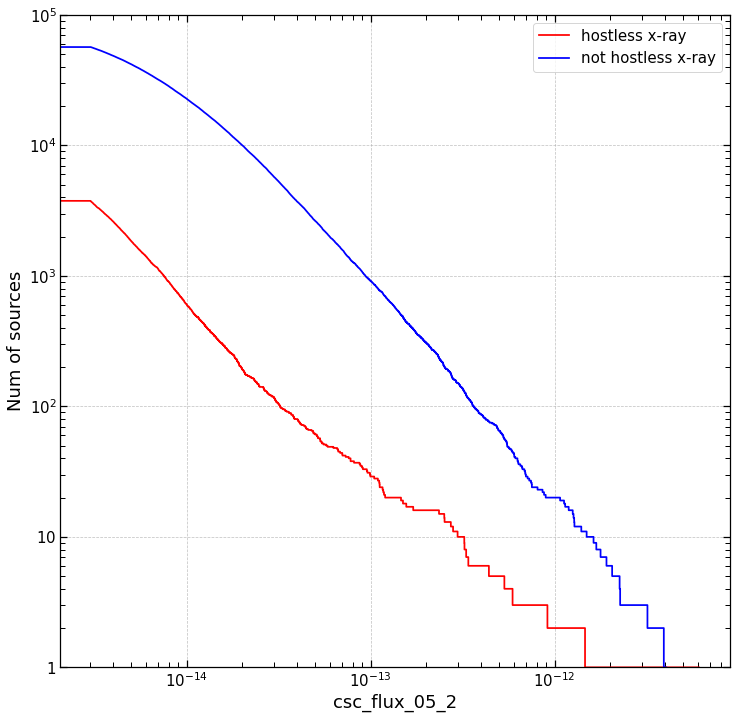

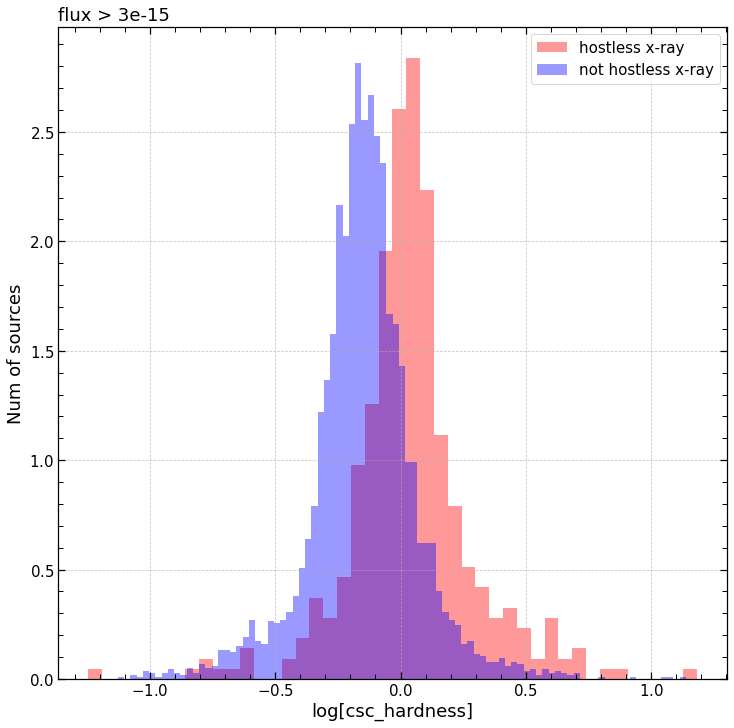

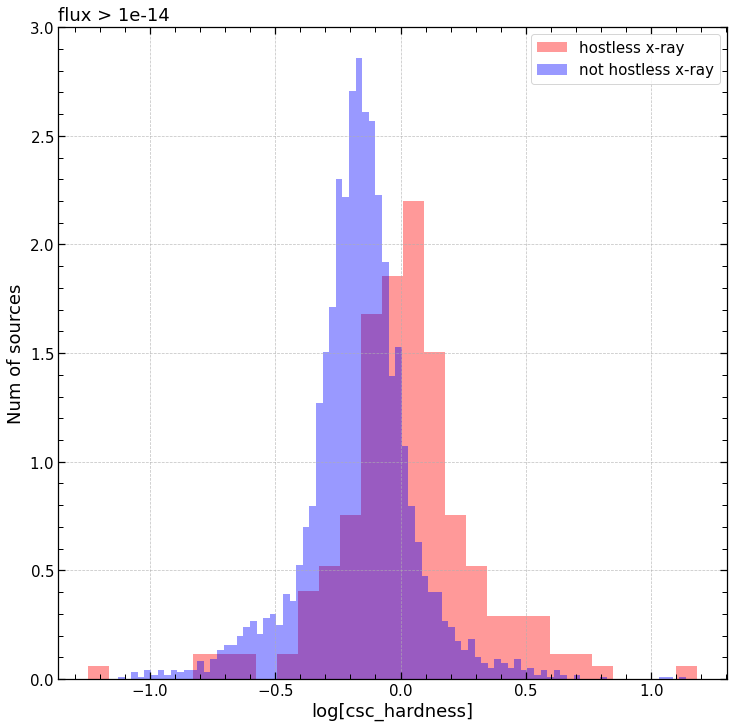

In [18]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(hostless_df['csc_flux_05_2'], label='hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only['csc_flux_05_2'], label='not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e5])
ax.legend()

for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'\t number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'\t number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'\t fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

    hardness_hostless = hostless_df.query('csc_flux_05_2 > @fluxlim & csc_hardness/csc_hardness_err>3').csc_hardness
    hardness_not_hostless = desi_csc_x_ray_only.query('csc_flux_05_2 > @fluxlim & csc_hardness/csc_hardness_err>3').csc_hardness
    fig,  ax =  plt.subplots( figsize = (12,12))
    ax.hist(np.log10(hardness_hostless), label='hostless x-ray', color='red', density=True, alpha = 0.4)
    ax.hist(np.log10(hardness_not_hostless), label='not hostless x-ray', color='blue', density=True, alpha = 0.4)
    ax.set(xlabel='log[csc_hardness]', ylabel='Num of sources')
    ax.set_title(f'flux > {fluxlim}')

    print(f"\t hostless x-ray hardness mean+-std: {np.mean(hardness_hostless):.2f}+-{np.std(hardness_hostless):.2f}")
    print(f"\t not hostless x-ray hardness mean+-std: {np.mean(hardness_not_hostless):.2f}+-{np.std(hardness_not_hostless):.2f}")

    ax.legend()



In [23]:
bright_hostless = hostless_df.sort_values(by=['csc_flux_05_2'], ascending=False).head(3)
bright_hostless

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_flux_aper_s,csc_flux_aper_s_err,csc_flux_aper_m,csc_flux_aper_m_err,csc_hardness,csc_hardness_err,csc_r_98,smallest_sep
134608,2CXO J012250.2+004243,20.709381,0.711973,6.117459e-12,4.341891e-12,1.071973e-13,1.775568e-12,5.520490e-14,0.408939,0.016236,1.259433,3.591558
503523,2CXO J080813.5+210608,122.056524,21.102360,1.465145e-12,1.262025e-12,4.281624e-14,2.031205e-13,1.291580e-14,0.160948,0.011600,1.171782,5.813634
1171823,2CXO J171952.9+263003,259.970447,26.500842,9.149394e-13,7.643849e-13,2.421112e-14,1.505544e-13,8.917567e-15,0.196962,0.013230,1.153927,5.816205


In [24]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
from astropy import units as u
customSimbad = Simbad()
# https://github.com/astropy/astroquery/blob/main/astroquery/simbad/data/votable_fields_dict.json
customSimbad.add_votable_fields(
    'distance_result', 'ra(d)', 'dec(d)',
    'otype', 'otype(V)', 'otype(S)', 'plx',
    'pmra', 'pmdec', 'plx_error'
    )


simbad_search_r = 5
coords = SkyCoord(bright_hostless['csc_ra'], bright_hostless['csc_dec'], unit='deg')
simbad_table = customSimbad.query_region(coords, radius=simbad_search_r * u.arcsec)
simbad_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,DISTANCE_RESULT,RA_d,DEC_d,OTYPE,OTYPE_V,OTYPE_S,PLX_VALUE,PMRA,PMDEC,PLX_ERROR,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,arcsec,deg,deg,,,,mas,mas / yr,mas / yr,mas,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float64,float64,object,object,object,float64,float64,float64,float32,int32
V* BI Cet,01 22 50.2948,+00 42 43.397,14,14,0.018,0.014,90,A,O,2020yCat.1350....0G,0.7151,20.70956185,0.71205482,RSCVnV*,RS CVn Variable,RSCVnV*,16.063,-114.450,-239.087,0.0225,1
BD+21 1764B,08 08 13.5967,+21 06 09.700,14,14,0.081,0.064,90,A,O,2020yCat.1350....0G,1.2790,122.05665301,21.10269468,SB*,Spectroscopic Binary,SB*,56.234,-270.070,-364.082,0.1134,2
Ross 867,17 19 52.9654,+26 30 02.667,14,14,0.020,0.026,90,A,O,2020yCat.1350....0G,0.8610,259.97068923,26.50074104,Eruptive*,Eruptive Variable,Eruptive*,92.958,-226.040,354.984,0.0305,3
